In [1]:
%matplotlib inline

# Tarea 6: Reducción de Dimensiones: Datos de tejido canceroso

Tecnológico de Costa Rica<br/>
Aprendizaje Automático <br/>


Cuaderno base para realizar la sección de la tarea 6 relacionada con la identificación de tejido canceroso.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

## Cargar datos de tejido canceroso

Los datos quedarán almacenados en X y las etiquetas en y

In [3]:
archivo_csv = 'cancer.csv' 

col_label = 1 ## Columna en el CSV con las etiquetas 'B'enigno o 'M'aligno
col_feats = 2 ## Columna en el CSV a partir de la cual se encuentran las características

horizontal=12  ## Tamaño de las figuras
figsize=(horizontal,horizontal/(16/9))

Cargar todos los datos en archivo csv

In [4]:
## Es necesario manejar manualmente la conversión del caracter en la 1era columna a número
converters={}
for i in range(32):
    converters[i] = lambda x : float(x)
converters[col_label] =  lambda x : 1.0 if (x==b'M') else 0.0

data = np.genfromtxt(archivo_csv, delimiter=',',skip_header=1,converters=converters)
print("Datos completos en matriz {0} x {1}".format(data.shape[0],data.shape[1]))

Datos completos en matriz 569 x 32


In [5]:
# La columna col_labels tiene las etiquetas
y=data[:,col_label].ravel()
print("Label shape:",y.shape)

# La columna col_grupos tiene los grupos
X=data[:,col_feats:32]
print("Data shape :",X.shape)


Label shape: (569,)
Data shape : (569, 30)


### Normalización de los datos

In [6]:
# Por hacer
import pickle

metodonormalizar = 2

# *************************************************************
if metodonormalizar == 1:

  from sklearn.preprocessing import StandardScaler

  # Normalizar los datos de entrenamiento
  scaler = StandardScaler()
  X_norm = scaler.fit_transform(X)

elif metodonormalizar == 2:

  from sklearn.preprocessing import MinMaxScaler

  # Normalizar los datos de entrenamiento
  scaler = MinMaxScaler()
  X_norm = scaler.fit_transform(X)

pickle.dump(scaler, open('Normalizadores/cancer.pkl', 'wb'))


## Métodos de reducción de dimensiones:

### PCA

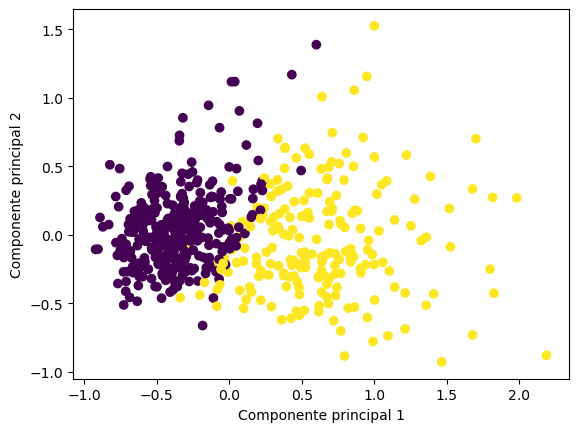

Componentes principales:
[[ 2.42675774e-01  9.64786101e-02  2.52550175e-01  2.16494530e-01
   1.09694618e-01  2.40397602e-01  3.01914206e-01  3.22475470e-01
   1.11431911e-01  4.32983397e-02  1.21760615e-01 -3.91796003e-05
   1.18580603e-01  1.03569266e-01 -4.68418094e-03  1.29319789e-01
   6.56807080e-02  1.24746120e-01  1.44902467e-02  4.55013416e-02
   2.59386850e-01  1.13833007e-01  2.60708399e-01  2.05917767e-01
   1.23773566e-01  2.04993413e-01  2.44083623e-01  3.71065064e-01
   9.59229054e-02  9.46335142e-02]
 [-2.61316697e-01 -5.90579194e-02 -2.38590061e-01 -2.31106830e-01
   1.99883951e-01  2.13914883e-01  1.13810591e-01 -8.31206237e-03
   2.11115126e-01  4.06392087e-01 -6.68985209e-02  6.00114468e-02
  -5.14164640e-02 -8.29631528e-02  1.35596439e-01  2.22352585e-01
   1.02792720e-01  1.05646780e-01  1.40474907e-01  1.71995173e-01
  -2.44281614e-01 -3.96817047e-02 -2.11635403e-01 -1.98979019e-01
   2.29454510e-01  1.98064332e-01  1.54982474e-01  4.43293805e-02
   1.51168839e-0

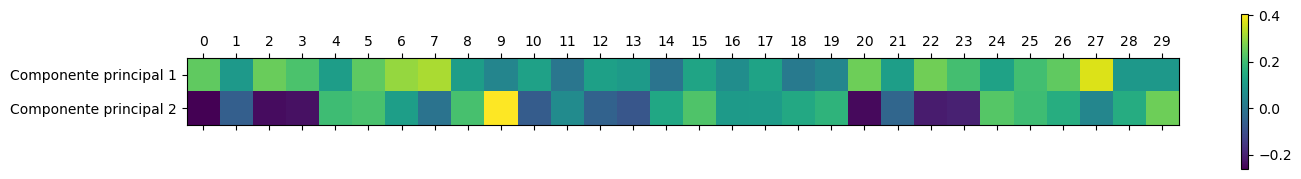

In [7]:
from sklearn.decomposition import PCA

# Asumiendo que X_norm es la matriz de datos normalizada
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_norm)

# Visualizar los datos proyectados
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.show()
#Punto 4
# Asumiendo que ya has ajustado el modelo PCA a los datos
print('Componentes principales:')
print(pca.components_)

print('Proporción de varianza explicada:')
print(pca.explained_variance_ratio_)

# Visualizar la importancia de cada característica
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ['Componente principal 1', 'Componente principal 2'])
plt.colorbar()
plt.xticks(range(X.shape[1]))
plt.show()

### KPCA

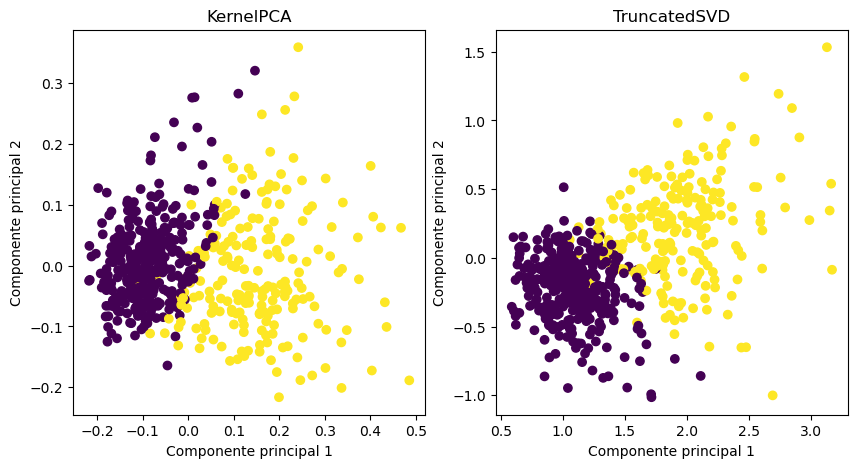

In [8]:
#Otros metodos
from sklearn.decomposition import KernelPCA, TruncatedSVD

# Asumiendo que X_norm es la matriz de datos normalizada
kpca = KernelPCA(n_components=2, kernel='rbf')
X_kpca = kpca.fit_transform(X_norm)

svd = TruncatedSVD(n_components=2)
X_svd = svd.fit_transform(X_norm)

# Visualizar los datos proyectados
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y)
ax1.set_xlabel('Componente principal 1')
ax1.set_ylabel('Componente principal 2')
ax1.set_title('KernelPCA')

ax2.scatter(X_svd[:, 0], X_svd[:, 1], c=y)
ax2.set_xlabel('Componente principal 1')
ax2.set_ylabel('Componente principal 2')
ax2.set_title('TruncatedSVD')

plt.show()

### Análisis discriminante

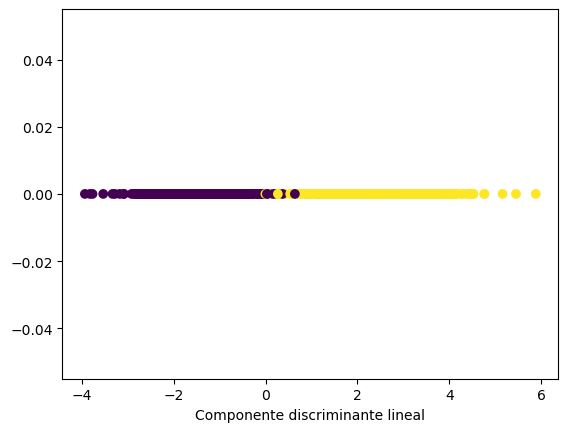

In [9]:
#Discriminacion
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Asumiendo que X_norm es la matriz de datos normalizada y y es el vector de etiquetas
lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit_transform(X_norm, y)

# Visualizar los datos proyectados
plt.scatter(X_lda[:, 0], np.zeros_like(X_lda[:, 0]), c=y)
plt.xlabel('Componente discriminante lineal')
plt.show()

### UMAP

C:\Users\Kley2\anaconda3\envs\tarea6\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


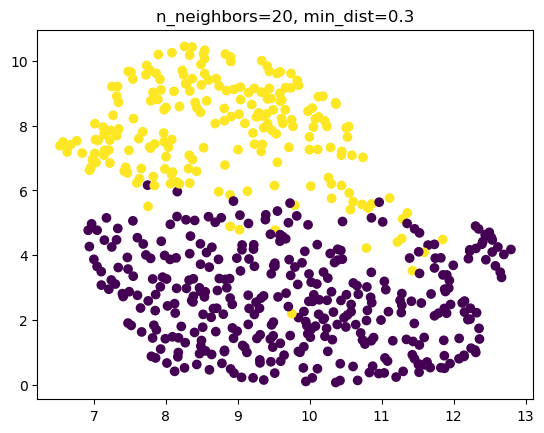

In [10]:
import umap
import itertools

#  /// 3*3*3*3 = 81 gráficos ///
#n_neighbors_values = [5, 10, 15]
#min_dist_values = [0.1, 0.3, 0.5]
#learning_rate_values = [0.1, 0.01, 0.001]
#n_epochs_values = [500, 1000, 1500]

#  /// Selección ///
#n_neighbors_values = [5]
#min_dist_values = [0.5]
#learning_rate_values = [0.01]
#n_epochs_values = [1500]

n_neighbors_values = [20]
min_dist_values = [0.3]
learning_rate_values = [0.01]
n_epochs_values = [1500]

# Datos de: https://umap-learn.readthedocs.io/en/latest/parameters.html

# Generar todas las combinaciones posibles de valores
#parameter_combinations = itertools.product(n_neighbors_values, min_dist_values, learning_rate_values, n_epochs_values)
parameter_combinations = itertools.product(n_neighbors_values, min_dist_values)

for combination in parameter_combinations:
    # Extraer los valores de los parámetros
    #n_neighbors, min_dist, learning_rate, n_epochs = combination
    n_neighbors, min_dist = combination
    
    # Crear y ajustar el modelo UMAP con los valores de los parámetros
    #reducer = umap.UMAP(n_neighbors=n_neighbors, min_dist=min_dist, learning_rate=learning_rate, n_epochs=n_epochs)
    reducer = umap.UMAP(n_neighbors=n_neighbors, min_dist=min_dist)
    
    umap_result = reducer.fit_transform(X_norm)
    
    # Visualizar los resultados con scatter
    plt.figure()
    plt.scatter(umap_result[:, 0], umap_result[:, 1], c=y)
    #plt.title(f"n_neighbors={n_neighbors}, min_dist={min_dist}, learning_rate={learning_rate}, n_epochs={n_epochs}")
    plt.title(f"n_neighbors={n_neighbors}, min_dist={min_dist}")
    
    
    plt.show()



### PaCMAP

<Figure size 640x480 with 0 Axes>

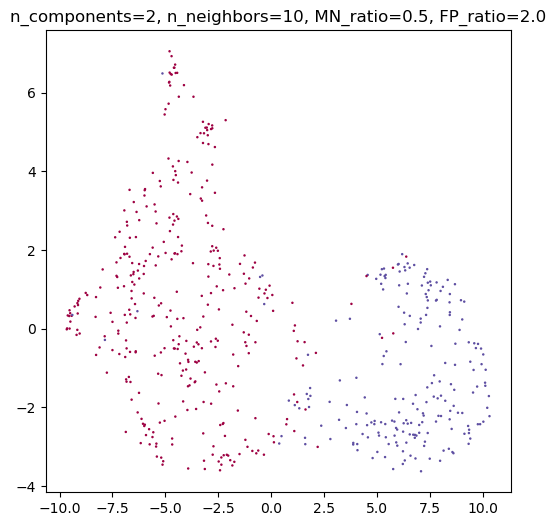

In [11]:

import pacmap

#  /// 2*2*2*2 = 16 gráficos ///

# Se pueden agregar varios valores como en el UMAP

#  /// Selección ///
n_components_values = [2]
n_neighbors_values = [10]
MN_ratio_values = [0.5]
FP_ratio_values = [2.0]

parameter_comb_pacmap = itertools.product(n_components_values, n_neighbors_values, MN_ratio_values, FP_ratio_values)


for combination in parameter_comb_pacmap:
    
    n_components, n_neighbors, MN_ratio, FP_ratio = combination
    
    # initializing the pacmap instance
    # Setting n_neighbors to "None" leads to a default choice shown below in "parameter" section
    reducer_pac = pacmap.PaCMAP(n_components=n_components, n_neighbors=n_neighbors, MN_ratio=MN_ratio, FP_ratio=FP_ratio) 

    # fit the data (The index of transformed data corresponds to the index of the original data)
    X_transformed = reducer_pac.fit_transform(X_norm, init="pca")

    plt.figure()
    fig, ax = plt.subplots(1, 1, figsize=(6, 6))
    ax.scatter(X_transformed[:, 0], X_transformed[:, 1], cmap="Spectral", c=y, s=0.6)
    plt.title(f"n_components={n_components}, n_neighbors={n_neighbors}, MN_ratio={MN_ratio}, FP_ratio={FP_ratio}")
    plt.show()



# Aglomeración 

# Cluster PCA

C:\Users\Kley2\anaconda3\envs\tarea6\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Kley2\anaconda3\envs\tarea6\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


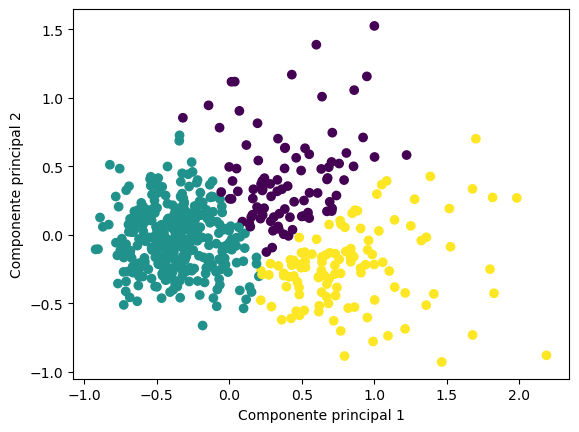

In [12]:
from sklearn.cluster import KMeans
k=3

kmeans = KMeans(n_clusters=k) # k es el número de clústers estimado en el paso anterior
kmeans.fit(X_pca)

# Obtener las etiquetas de clúster para cada punto de datos
cluster_labels = kmeans.predict(X_pca)

# Visualizar los clústers encontrados
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels)
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.show()

# Cluster KPCA

C:\Users\Kley2\anaconda3\envs\tarea6\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Kley2\anaconda3\envs\tarea6\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


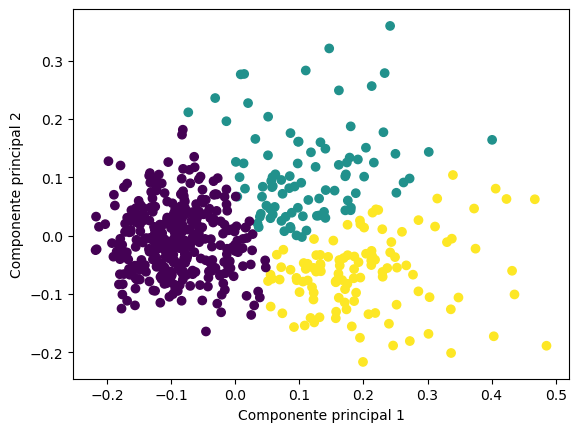

In [13]:
# Visualizar los clústers encontrados
kmeans = KMeans(n_clusters=k) # k es el número de clústers estimado en el paso anterior
kmeans.fit(X_kpca)

# Obtener las etiquetas de clúster para cada punto de datos
cluster_labels = kmeans.predict(X_kpca)


plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=cluster_labels)
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.show()

# Cluster SVD

C:\Users\Kley2\anaconda3\envs\tarea6\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Kley2\anaconda3\envs\tarea6\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


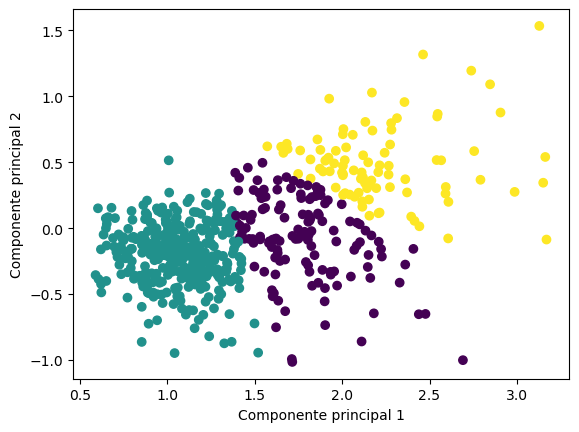

In [14]:
# Visualizar los clústers encontrados
kmeans = KMeans(n_clusters=k) # k es el número de clústers estimado en el paso anterior
kmeans.fit(X_svd)

# Obtener las etiquetas de clúster para cada punto de datos
cluster_labels = kmeans.predict(X_svd)

# Visualizar los clústers encontrados
plt.scatter(X_svd[:, 0], X_svd[:, 1], c=cluster_labels)
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.show()

# Cluster LDA

C:\Users\Kley2\anaconda3\envs\tarea6\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Kley2\anaconda3\envs\tarea6\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


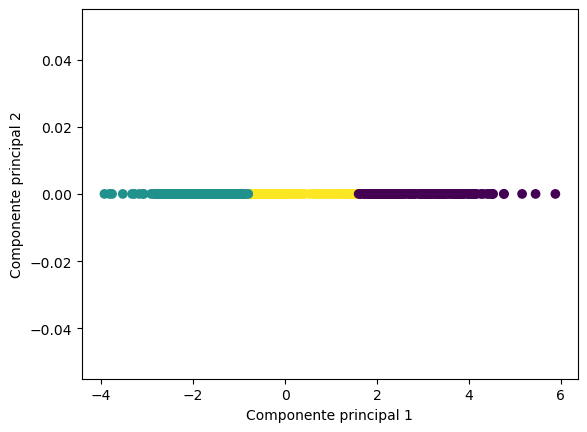

In [15]:
# Visualizar los clústers encontrados
kmeans = KMeans(n_clusters=k) # k es el número de clústers estimado en el paso anterior
kmeans.fit(X_lda)

# Obtener las etiquetas de clúster para cada punto de datos
cluster_labels = kmeans.predict(X_lda)

# Visualizar los clústers encClusterontrados
plt.scatter(X_lda[:, 0], np.zeros_like(X_lda[:, 0]), c=cluster_labels)
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.show()

# Cluster UMAP

C:\Users\Kley2\anaconda3\envs\tarea6\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Kley2\anaconda3\envs\tarea6\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


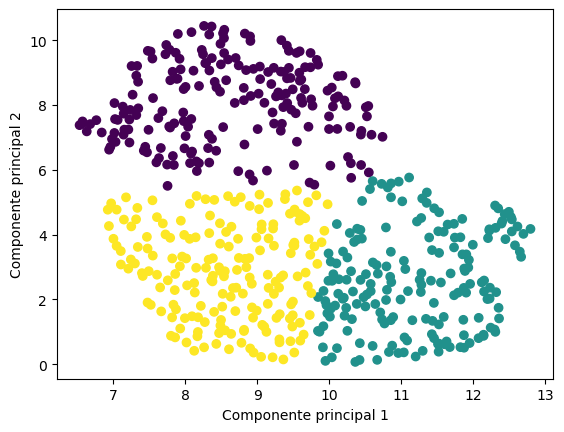

In [16]:
# Visualizar los clústers encontrados
kmeans = KMeans(n_clusters=k) # k es el número de clústers estimado en el paso anterior
kmeans.fit(umap_result)

# Obtener las etiquetas de clúster para cada punto de datos
cluster_labels = kmeans.predict(umap_result)

# Visualizar los clústers encontrados
plt.scatter(umap_result[:, 0], umap_result[:, 1], c=cluster_labels)
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.show()

# Cluster PaCMAP

C:\Users\Kley2\anaconda3\envs\tarea6\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Kley2\anaconda3\envs\tarea6\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


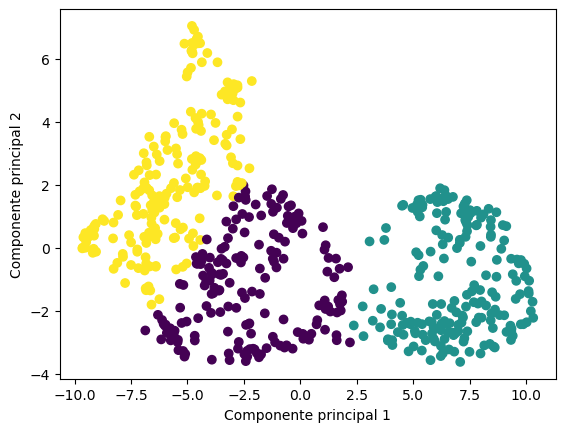

In [17]:
# Visualizar los clústers encontrados
kmeans = KMeans(n_clusters=k) # k es el número de clústers estimado en el paso anterior
kmeans.fit(X_transformed)

# Obtener las etiquetas de clúster para cada punto de datos
cluster_labels = kmeans.predict(X_transformed)

# Visualizar los clústers encontrados
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=cluster_labels)
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.show()

In [18]:
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# Split data into training, validation and test sets
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25)

# Define number of components for GaussianMixture
n_components = 2




def gmm_bic_score(estimator, X):
    """Callable to pass to GridSearchCV that will use the BIC score."""
    # Make it negative since GridSearchCV expects a score to maximize
    return -estimator.bic(X)


param_grid = {
    "n_components": range(1, 7),
    "covariance_type": ["spherical", "tied", "diag"]
}


grid_search_benigno = GridSearchCV(
    GaussianMixture(), param_grid=param_grid, scoring=gmm_bic_score
)
grid_search_maligno = GridSearchCV(
    GaussianMixture(), param_grid=param_grid, scoring=gmm_bic_score
)


grid_search_benigno.fit(X_train[y_train == 0])
grid_search_maligno.fit(X_train[y_train == 1])


# Predict probabilities on validation set
prob_class_0 = grid_search_benigno.score_samples(X_val)
prob_class_1 = grid_search_maligno.score_samples(X_val)


y_pred = (prob_class_1 > prob_class_0).astype(int)


accuracy = (y_pred == y_val).mean()
print(f'Validation accuracy: {accuracy:.2f}')
#Profe ignore los warnings todo esta bien :D (esperemos)
#Entre todos ellos esta la "Validation acuracy:0.88" 

C:\Users\Kley2\anaconda3\envs\tarea6\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Kley2\anaconda3\envs\tarea6\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Kley2\anaconda3\envs\tarea6\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Kley2\anaconda3\envs\tarea6\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

C:\Users\Kley2\anaconda3\envs\tarea6\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Kley2\anaconda3\envs\tarea6\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Kley2\anaconda3\envs\tarea6\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Kley2\anaconda3\envs\tarea6\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

C:\Users\Kley2\anaconda3\envs\tarea6\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Kley2\anaconda3\envs\tarea6\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Kley2\anaconda3\envs\tarea6\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Kley2\anaconda3\envs\tarea6\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

C:\Users\Kley2\anaconda3\envs\tarea6\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Kley2\anaconda3\envs\tarea6\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Kley2\anaconda3\envs\tarea6\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Kley2\anaconda3\envs\tarea6\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

C:\Users\Kley2\anaconda3\envs\tarea6\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Kley2\anaconda3\envs\tarea6\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Kley2\anaconda3\envs\tarea6\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Kley2\anaconda3\envs\tarea6\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

C:\Users\Kley2\anaconda3\envs\tarea6\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Kley2\anaconda3\envs\tarea6\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Kley2\anaconda3\envs\tarea6\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Kley2\anaconda3\envs\tarea6\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

C:\Users\Kley2\anaconda3\envs\tarea6\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Kley2\anaconda3\envs\tarea6\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Kley2\anaconda3\envs\tarea6\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Kley2\anaconda3\envs\tarea6\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

Validation accuracy: 0.92


C:\Users\Kley2\anaconda3\envs\tarea6\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Kley2\anaconda3\envs\tarea6\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [19]:
import pandas as pd

df = pd.DataFrame(grid_search_benigno.cv_results_)[
    ["param_n_components", "param_covariance_type", "mean_test_score"]
]
df["mean_test_score"] = -df["mean_test_score"]
df = df.rename(
    columns={
        "param_n_components": "Number of components",
        "param_covariance_type": "Type of covariance",
        "mean_test_score": "BIC score",
    }
)
df.sort_values(by="BIC score").head()


,Number of components,Type of covariance,BIC score
6,1,tied,-2556.309913
13,2,diag,-2495.411824
14,3,diag,-2479.598103
15,4,diag,-2429.245365
7,2,tied,-2397.167549


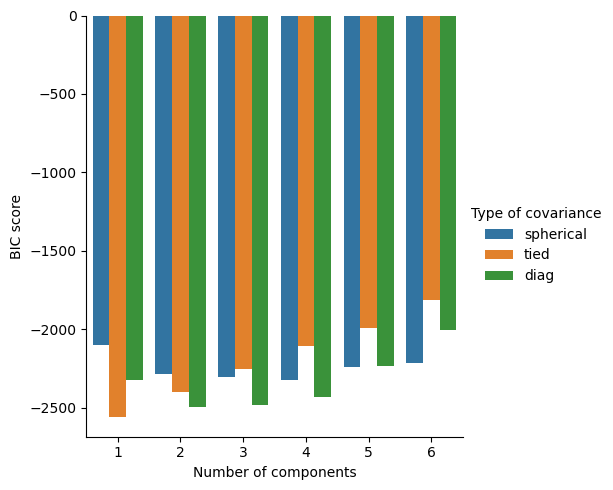

In [20]:

import seaborn as sns

sns.catplot(
    data=df,
    kind="bar",
    x="Number of components",
    y="BIC score",
    hue="Type of covariance",
)
plt.show()

In [21]:
import pandas as pd

df2 = pd.DataFrame(grid_search_maligno.cv_results_)[
    ["param_n_components", "param_covariance_type", "mean_test_score"]
]
df2["mean_test_score"] = -df2["mean_test_score"]
df2 = df2.rename(
    columns={
        "param_n_components": "Number of components",
        "param_covariance_type": "Type of covariance",
        "mean_test_score": "BIC score",
    }
)
df2.sort_values(by="BIC score").head()

,Number of components,Type of covariance,BIC score
2,3,spherical,-824.457606
3,4,spherical,-775.985185
1,2,spherical,-769.450427
0,1,spherical,-722.218016
4,5,spherical,-689.744695


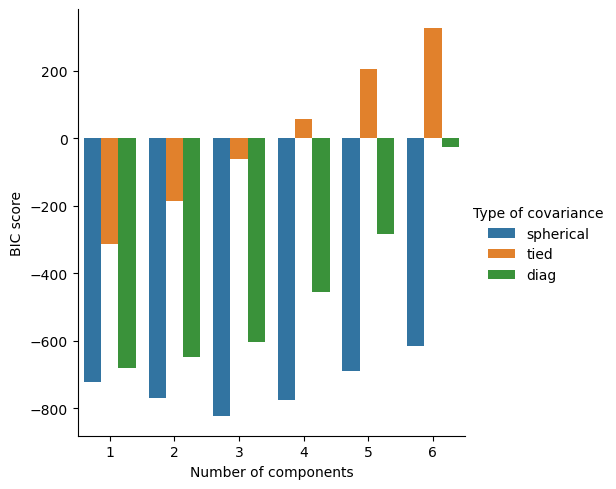

In [22]:
import seaborn as sns

sns.catplot(
    data=df2,
    kind="bar",
    x="Number of components",
    y="BIC score",
    hue="Type of covariance",
)
plt.show()